**3.4 SEABORN**

The matplotlib library can be thought of as the core foundational plotting tool in Python. seaborn builds on matplotlib by providing a higher-level interface for statistical graphics. It provides an interface to produce prettier and more complex visualizations with fewer lines of code.

The seaborn library is tightly integrated with Pandas and the rest of the PyData stack (numpy, scipy, statsmodels), making visualizations from any part of the data analysis process a breeze. Since seaborn is built on top of matplotlib, the user still has the ability to fine-tune the visualizations.

We’ve already loaded the seaborn library so that we could access its data sets.

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")

print(tips.head(n=10))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


**3.4.1 Univariate**

Just like we did with the matplotlib examples, we will make a series of univariate plots.

**3.4.1.1 Histograms**

Histograms are created using sns.distplot5 (Figure 3.12).

5. seaborn distplot documentation: https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot

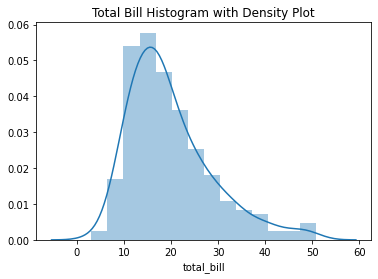

In [4]:
import matplotlib.pyplot as plt

# this subplots function is a shortcut for
# creating separate figure objects and
# adding individual subplots (axes) to the figure
hist, ax = plt.subplots()

# use the distplot function from seaborn to create our plot
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

plt.show() # we still need matplotlib.pyplot to show the figure

The default distplot will plot both a histogram and a density plot (using a kernel density estimation). If we just want the histogram, we can set the kde parameter to False. The results are shown in Figure 3.13.

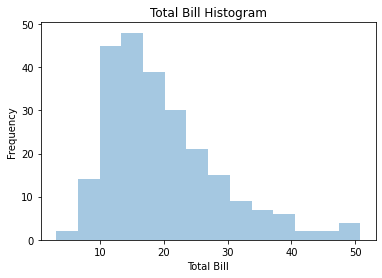

In [7]:
hist, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

plt.show()

You can also sns.kdeplot if you just want a density plot.

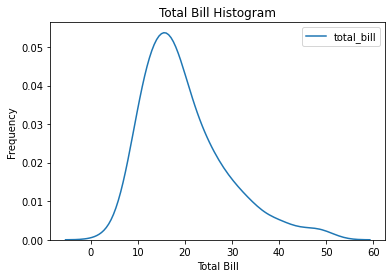

In [9]:
hist, ax = plt.subplots()
ax = sns.kdeplot(tips['total_bill'])
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

plt.show()

**3.4.1.3 Rug Plot**

Rug plots are a one-dimensional representation of a variable’s distribution. They are typically used with other plots to enhance a visualization. Figure 3.15 shows a histogram overlaid with a density plot and a rug plot on the bottom.

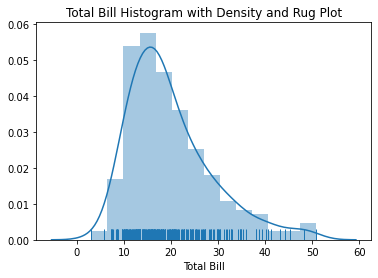

In [10]:
hist_den_rug, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

plt.show()

**3.4.1.4 Count Plot (Bar Plot)**

Bar plots are very similar to histograms, but instead of binning values to produce a distribution, bar plots can be used to count discrete variables. A count plot (Figure 3.16) is used for this purpose.

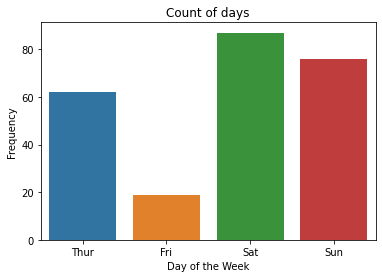

In [11]:
count, ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

plt.show()

**3.4.2 Bivariate Data**

We will now use the seaborn library to plot two variables.

**3.4.2.1 Scatterplot**

There are a few ways to create a scatterplot in seaborn. There is no explicit function named scatter. Instead, we use regplot. It will plot a scatterplot and also fit a regression line. If we set fit_reg=False, the visualization will show only the scatterplot (Figure 3.17).

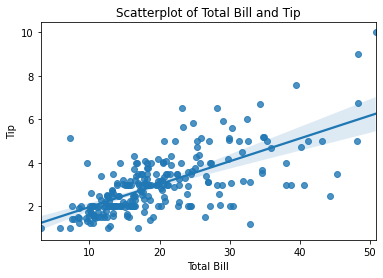

In [14]:
scatter, ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()

A similar function, lmplot, can also create scatterplots. Internally, lmplot calls regplot, so regplot is a more general plotting function. The main difference is that regplot creates axes (Figure 3.6) whereas lmplot creates a figure (Figure 3.18).

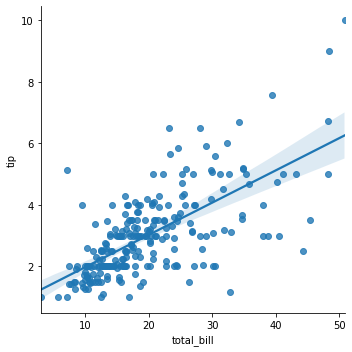

In [15]:
fig = sns.lmplot(x='total_bill', y='tip', data=tips)

plt.show()

We can also create a scatterplot that includes a univariate plot on each axis using jointplot (Figure 3.19). One major difference is that jointplot does not return axes, so we do not need to create a figure with axes on which to place our plot. Instead, this function creates a JointGrid object.

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

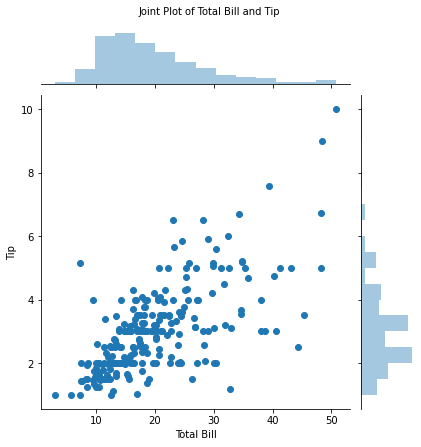

In [16]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

# add a title, set font size,
# and move the text above the total bill axes
joint.fig.suptitle('Joint Plot of Total Bill and Tip',
                fontsize=10, y=1.03)

**3.4.2.2 Hexbin Plot**

Scatterplots are great for comparing two variables. However, sometimes there are too many points for a scatterplot to be meaningful. One way to get around this issue is to bin points on the plot together. Just as histograms can bin a variable to create a bar, so hexbin can bin two variables (Figure 3.20). A hexagon is used for this purpose because it is the most efficient shape to cover an arbitrary 2D surface. This is an example of seaborn building on top of matplotlib, as hexbin is a matplotlib function.

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

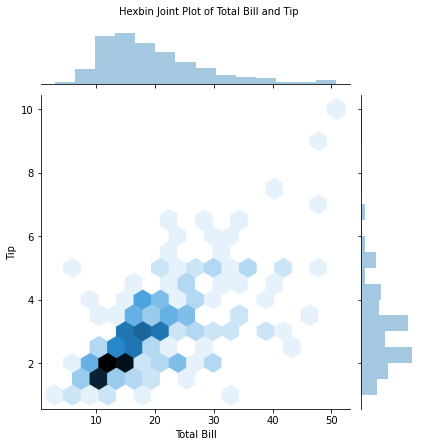

In [17]:
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip',
                 fontsize=10, y=1.03)

**3.4.2.3 2D Density Plot**

You can also create a 2D kernel density plot. This kind of process is similar to how sns.kdeplot works, except it creates a density plot across two variables. The bivariate plot can be shown on its own (Figure 3.21), or you can place the two univariate plots next to each other using jointplot (Figure 3.22).

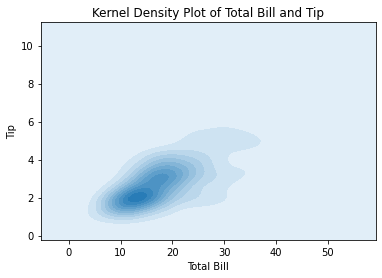

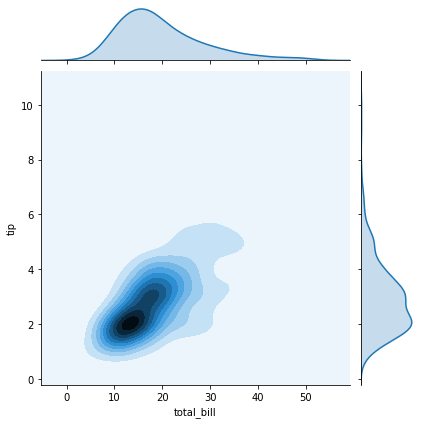

In [18]:
kde, ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'],
                 shade=True) # shade will fill in the contours

ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()

kde_joint = sns.jointplot(x='total_bill', y='tip',
                          data=tips, kind='kde')

**3.4.2.4 Bar Plot**

Bar Plots can also be used to show multiple variables. By default, barplot will calculate a mean (Figure 3.23), but you can pass any function into the estimator parameter. For example, you could pass in the numpy.std function to calculate the standard deviation.

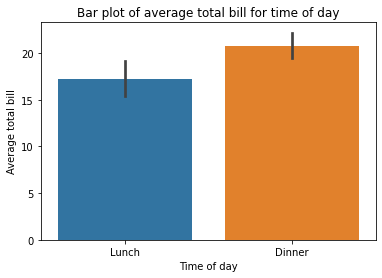

In [19]:
bar, ax = plt.subplots()

ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

plt.show()

**3.4.2.5 Boxplot**

Unlike the previously mentioned plots, a boxplot (Figure 3.24) shows multiple statistics: the minimum, first quartile, median, third quartile, maximum, and, if applicable, outliers based on the interquartile range.

The y parameter is optional. If it is omitted, the plotting function will create a single box in the plot.

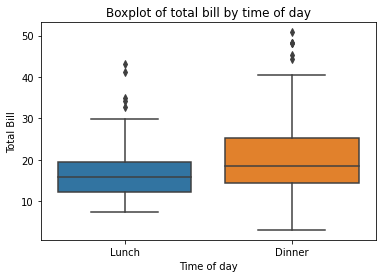

In [20]:
box, ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

plt.show()

**3.4.2.6 Violin Plot**

Boxplots are a classical statistical visualization, but they can obscure the underlying distribution of the data. Violin plots (Figure 3.25) are able to show the same values as a boxplot, but plot the “boxes” as a kernel density estimation. This can help retain more visual information about your data since only plotting summary statistics can be misleading, as seen by the Anscombe quartet.

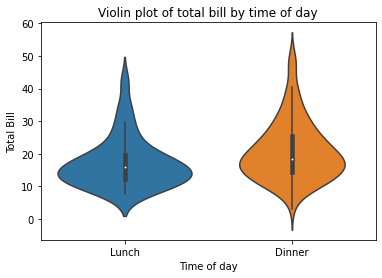

In [21]:
violin, ax = plt.subplots()

ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

plt.show()

**3.4.2.7 Pairwise Relationships**

When you have mostly numeric data, visualizing all of the pairwise relationships can be easily performed using pairplot. This function will plot a scatterplot between each pair of variables, and a histogram for the univariate data (Figure 3.26).

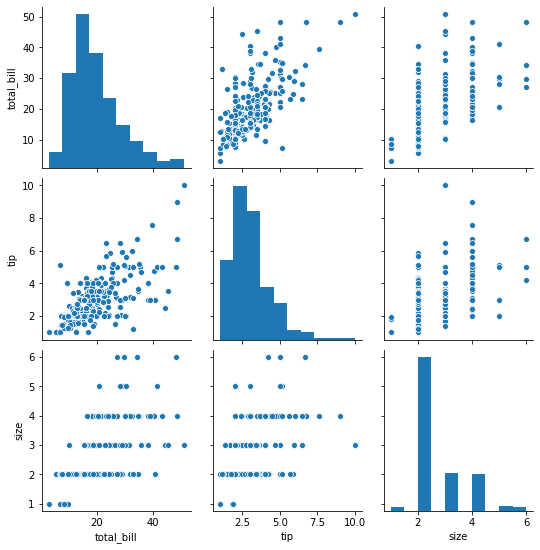

In [23]:
fig = sns.pairplot(tips)

One drawback when using pairplot is that there is redundant information; that is, the top half of the the visualization is the same as the bottom half. We can use pairgrid to manually assign the plots for the top half and bottom half. This plot is shown in Figure 3.27.

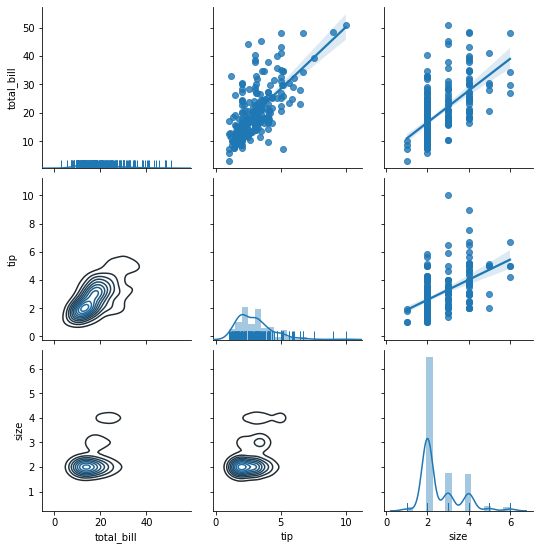

In [24]:
pair_grid = sns.PairGrid(tips)

# we can use plt.scatter instead of sns.regplot
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

plt.show()

**3.4.3 Multivariate Data**

As mentioned in Section 3.3.3, there is no de facto template for plotting multivariate data. Possible ways to include more information are to use color, size, and shape to distinguish data within the plot.

**3.4.3.1 Colors**

When we are using violinplot, we can pass the hue parameter to color the plot by sex. We can reduce the redundant information by having each half of the violins represent a different sex, as shown in Figure 3.28. Try the following code with and without the split parameter.

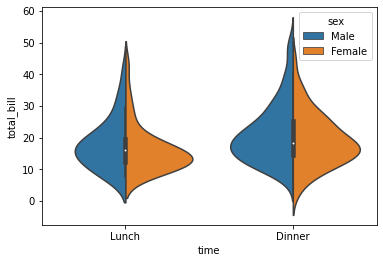

In [25]:
violin, ax = plt.subplots()

ax = sns.violinplot(x='time', y='total_bill',
                    hue='sex', data=tips,
                    split=True)

plt.show()

The hue parameter can be passed into various other plotting functions as well. Figure 3.29 shows its use in a lmplot:

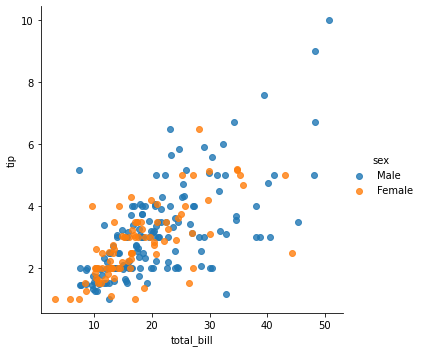

In [26]:
# note the use of lmplot instead of regplot here
scatter = sns.lmplot(x='total_bill', y='tip', data=tips,
                     hue='sex', fit_reg=False)

plt.show()

We can make our pairwise plots a little more meaningful by passing one of the categorical variables as the hue parameter. Figure 3.30 shows this approach in our pairplot.

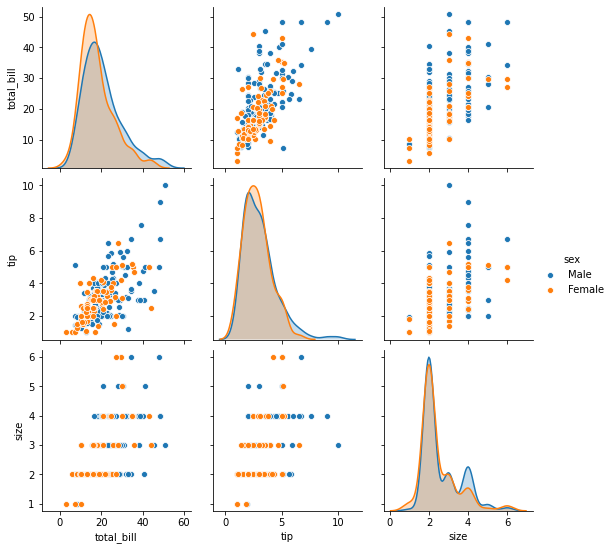

In [27]:
fig = sns.pairplot(tips, hue='sex')

**3.4.3.2 Size and Shape**

Working with point sizes can be another means to add more information to a plot. However, this option should be used sparingly, since the human eye is not very good at comparing areas.

Let’s consider an example of how seaborn works with matplotlib function calls. If you look in the documentation for lmplot,6 you’ll see that lmplot takes a parameter called catter, line scatter, line_kws. In other words, there is a parameter in lmplot called scatter_kws and line_kws. Both of these parameters take a key–value pair—a Python dict (dictionary) to be more exact (Appendix K). Key–value pairs passed into scatter_kws are then passed on to the matplotlib function plt.scatter. This is how we would access the s parameter to change the size of the points, as we did in Section 3.3.3. This is shown in Figure 3.31.

6. https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html

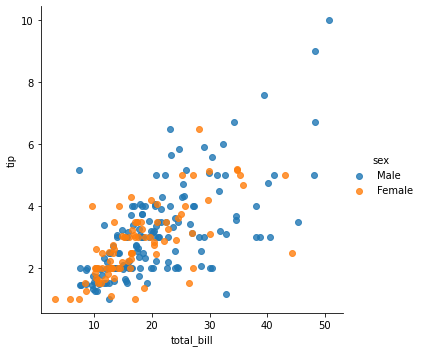

In [35]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips,
                     fit_reg=False,
                     hue='sex', scatter = {'s': tips['size']*10})

plt.show()

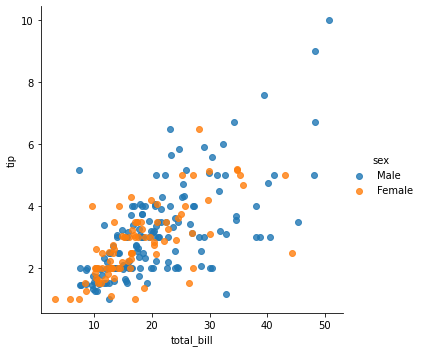

In [36]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips,
                     fit_reg=False,
                     hue='sex')

plt.show()

Also, when working with multiple variables, sometimes having two plot elements that show the same information is helpful. Figure 3.32 shows the use of color and shape to distinguish different values of the variable sex.

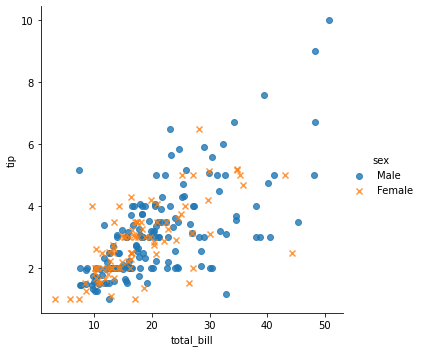

In [42]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips,
                     fit_reg=False, hue='sex', markers=['o', 'x'])

plt.show()

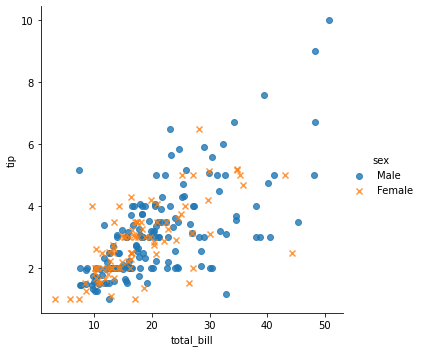

In [44]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips,
          fit_reg=False, hue='sex', markers=['o', 'x'],
          scatter={'s': tips['size']*10})

plt.show()

**3.4.3.3 Facets**

What if we want to show more variables? Or if we know which plot we want for our visualization, but we want to make multiple plots over a categorical variable? Facets are designed to meet these needs. Instead of you needing to individually subset data and lay out the axes in a figure (as we did in Figure 3.5), facets in seaborn can handle this work for you.

To use facets, your data needs to be what Hadley Wickham7 calls “Tidy Data,”8 where each row represents an observation in the data, and each column is a variable (also known as “long data”).

7. http://hadley.nz/

8. http://vita.had.co.nz/papers/tidy-data.pdf

Figure 3.33 shows a re-creation of the Anscombe quartet data from Figure 3.5 in seaborn.

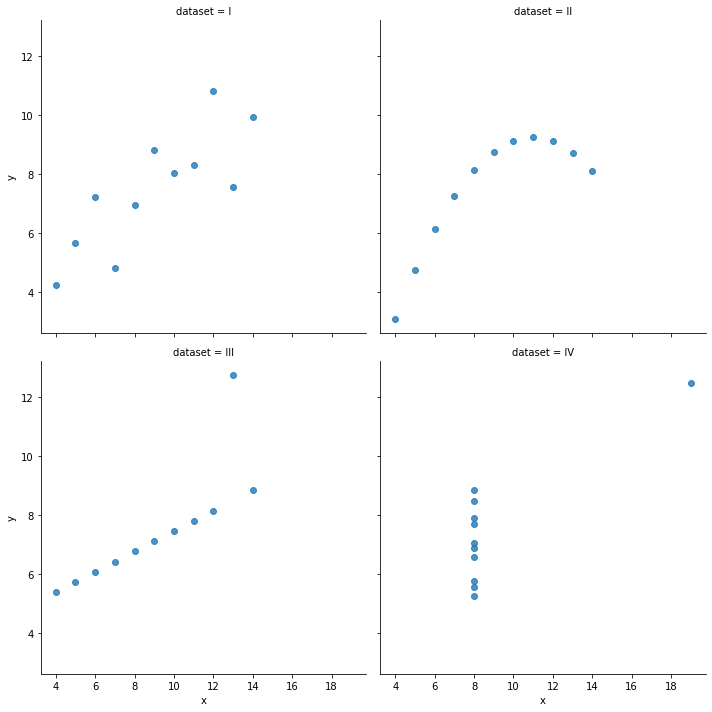

In [46]:
anscombe = sns.load_dataset("anscombe")

anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe,
                           fit_reg=False,
                           col='dataset', col_wrap=2)

All we needed to do to create this visualization was to pass two more parameters into the scatterplot function in seaborn. The col parameter is the variable that the plot will facet by, and the col_wrap parameter creates a figure that has two columns. If we do not use the col_wrap parameter, all four plots will be plotted in the same row.

Section 3.4.2.1 discussed the differences between lmplot and regplot. lmplot is a figure-level function. In contrast, many of the plots we created in seaborn are axes-level functions. What this means is that not every plotting function will have col and col_wrap parameters for faceting. Instead, we must create a FacetGrid that knows which variable to facet on, and then supply the individual plot code for each facet. Figure 3.34 shows our manually created facet plot.

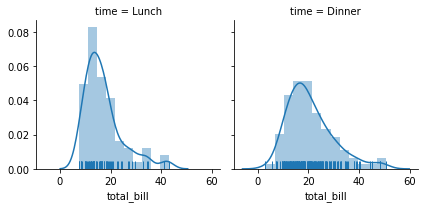

In [47]:
# create the FacetGrid
facet = sns.FacetGrid(tips, col='time')

# for each value in time, plot a histogram of total bill
facet.map(sns.distplot, 'total_bill', rug=True)

plt.show()

The individual facets need not be univariate plots, as seen in Figure 3.35.

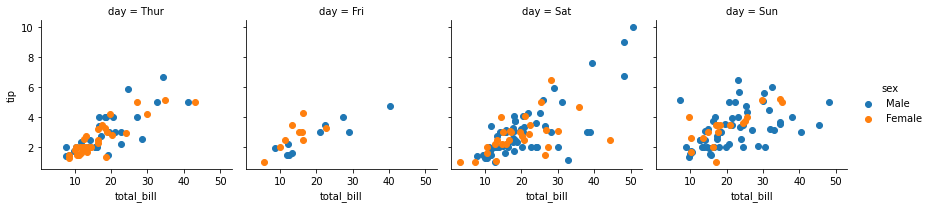

In [48]:
facet = sns.FacetGrid(tips, col='day', hue='sex')

facet = facet.map(plt.scatter, 'total_bill', 'tip')

facet = facet.add_legend()

plt.show()

If you wanted to continue working in seaborn, you could create the same plot using lmplot, as shown in Figure 3.36.

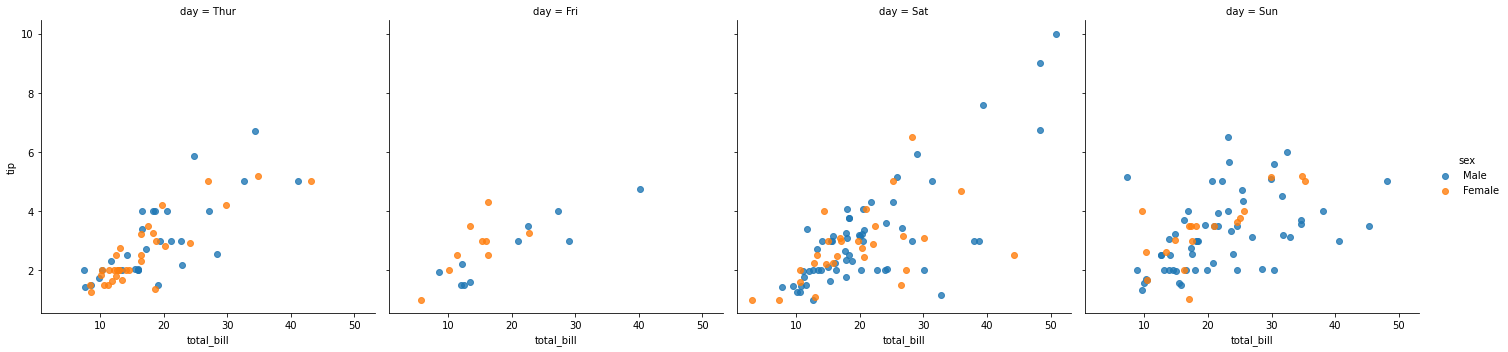

In [49]:
fig = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False,
                 hue='sex', col='day')

plt.show()

Another thing you can do with facets is to have one variable be faceted on the x-axis, and another variable faceted on the y-axis. We accomplish this by passing a row parameter. The result is shown in Figure 3.37.

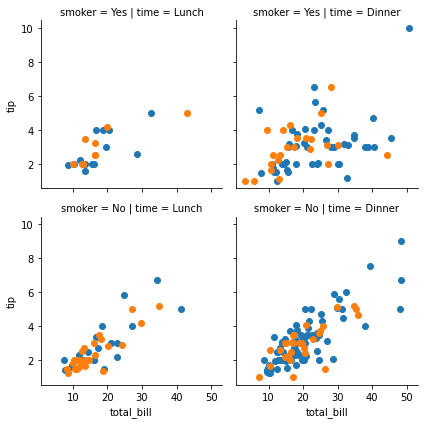

In [50]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')

facet.map(plt.scatter, 'total_bill', 'tip')

plt.show()

If you do not want all of the hue elements to overlap (i.e., you want this behavior in scatterplots, but not violin plots), you can use the sns.factorplot function. The result is shown in Figure 3.38.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


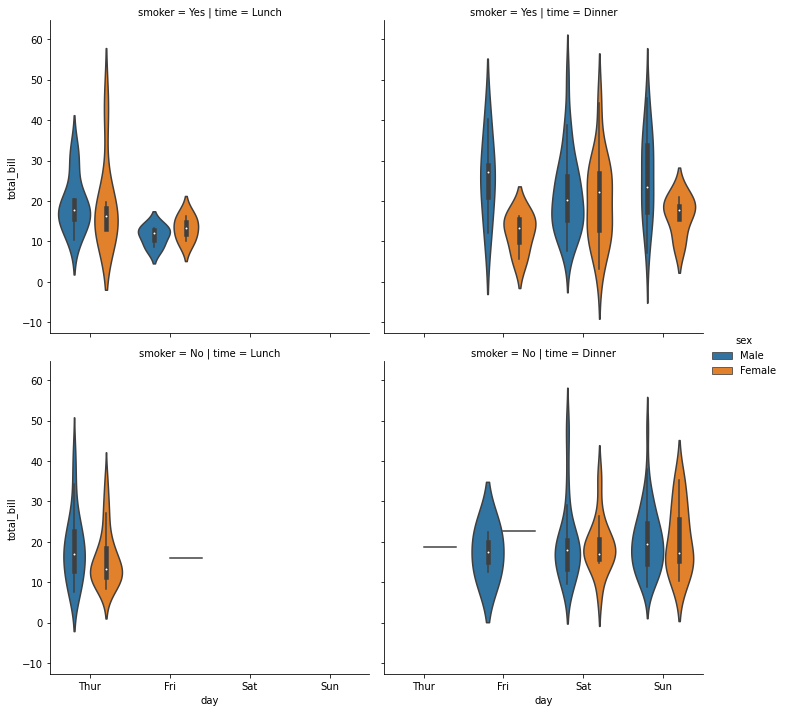

In [51]:
facet = sns.factorplot(x='day', y='total_bill', hue='sex', data=tips,
                       row='smoker', col='time', kind='violin')